In [1]:
import pandas as pd

data = pd.read_csv('../Data/Processed/processed.csv')

In [85]:
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering, Birch, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture

methods = {
    "AC": AgglomerativeClustering(),
     "KMeans" : KMeans(), 
     "SC": SpectralClustering(), 
     "Birch": Birch(),
     "DBSCAN": DBSCAN(), 
     "MeanShift": MeanShift(),
}


In [63]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
silhouette_scores_avg = []
iterations_per_method = 100

for index, method in enumerate(methods.values()):
    silhouette_scores_for_method = []
    for iteration in range(iterations_per_method): 
        prediction = method.fit_predict(X=data)
        sc = silhouette_score(data, prediction)
        silhouette_scores.append((index, sc))
        silhouette_scores_for_method.append(sc)
    silhouette_score_average = sum(silhouette_scores_for_method)/len(silhouette_scores_for_method)
    silhouette_scores_avg.append((index, silhouette_score_average))





In [60]:
sc_xs, sc_ys = zip(*silhouette_scores)

([<matplotlib.axis.XTick at 0x1d5e8f10>,
 [Text(0, 0, 'AC'),
  Text(1, 0, 'KMeans'),
  Text(2, 0, 'SC'),
  Text(3, 0, 'Birch'),
  Text(4, 0, 'DBSCAN'),
  Text(5, 0, 'MeanShift')])

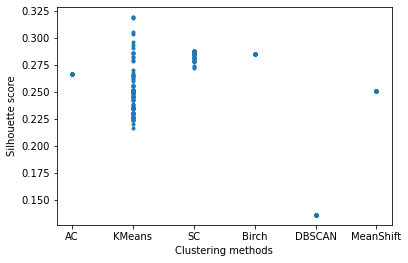

In [86]:
import matplotlib.pyplot as plt

plt.plot(sc_xs, sc_ys, '.')
plt.xlabel("Clustering methods")
plt.ylabel("Silhouette score")
plt.xticks([i for i in range(len(methods))],methods.keys())

[Text(0, 0, 'AC'),
 Text(1, 0, 'KMeans'),
 Text(2, 0, 'SC'),
 Text(3, 0, 'Birch'),
 Text(4, 0, 'DBSCAN'),
 Text(5, 0, 'MeanShift')]

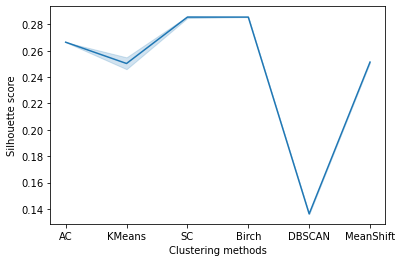

In [87]:
import seaborn as sns

ax = sns.lineplot(x = sc_xs, y = sc_ys)
ax.set(xlabel='Clustering methods', ylabel='Silhouette score')
ax.set_xticks([i for i in range(len(methods))])
ax.set_xticklabels(list(methods.keys()))